In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from keras import backend as K
import matplotlib.pyplot as plt

ce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opt = tf.keras.optimizers.Adam()
train_loss = tf.keras.metrics.Mean()
test_loss = tf.keras.metrics.Mean()
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)
dst = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [2]:
class NN(Model):
  def __init__(self):
    super(NN, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='ReLU')
    self.d1 = Dense(128, activation='ReLU')
    self.d2 = Dense(10)
    self.flatten = Flatten()

  def call(self, x):
    y = self.conv1(x)
    y = self.flatten(y)
    y = self.d1(y)
    return self.d2(y)

In [3]:
model = NN()

@tf.function
def train_step(images, labels):  
    with tf.GradientTape() as gt:
        p = model(images)
        loss = ce(labels, p)
    gradients = gt.gradient(loss, model.trainable_variables)
    opt.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, p)

@tf.function
def test_step(images, labels):
    p = model(images)
    t_loss = ce(labels, p)

    test_loss(t_loss)
    test_accuracy(labels, p)



In [4]:
EPOCHS = 4
import numpy as np
l_rate = []
obtained_accuracy = []
    
for learning_rate in range(1,4):
    
    # change the learning rate
    my_learning_rate = learning_rate/1000
    l_rate.append(my_learning_rate)
    #K.set_value(model.optimizer.learning_rate, my_learning_rate)
    opt.learning_rate.assign(my_learning_rate)
    
    print("\n For learning rate: ", my_learning_rate)
    for epoch in range(EPOCHS):
        train_loss.reset_states()
        train_accuracy.reset_states()
        test_loss.reset_states()
        test_accuracy.reset_states()

        print("Training epoch:", epoch+1)
        for images, labels in ds:
            train_step(images, labels)


        for test_images, test_labels in dst:
            test_step(test_images, test_labels)
    
        print(
        f'Epoch {epoch + 1}, '
        f'Loss: {train_loss.result()}, '
        f'Accuracy: {train_accuracy.result() * 100}, '
        f'Test Loss: {test_loss.result()}, '
        f'Test Accuracy: {test_accuracy.result() * 100}'
        )

    obtained_accuracy.append((train_accuracy.result() * 100))


 For learning rate:  0.001
Training epoch: 1
Epoch 1, Loss: 0.139873206615448, Accuracy: 95.85499572753906, Test Loss: 0.06252478063106537, Test Accuracy: 97.91999816894531
Training epoch: 2
Epoch 2, Loss: 0.04330797493457794, Accuracy: 98.6883316040039, Test Loss: 0.0608750656247139, Test Accuracy: 97.91999816894531
Training epoch: 3
Epoch 3, Loss: 0.02174942009150982, Accuracy: 99.3116683959961, Test Loss: 0.05319492518901825, Test Accuracy: 98.23999786376953
Training epoch: 4
Epoch 4, Loss: 0.01184553001075983, Accuracy: 99.60333251953125, Test Loss: 0.06747294217348099, Test Accuracy: 98.15999603271484

 For learning rate:  0.002
Training epoch: 1
Epoch 1, Loss: 0.03298448771238327, Accuracy: 98.92832946777344, Test Loss: 0.06454438716173172, Test Accuracy: 98.18000030517578
Training epoch: 2
Epoch 2, Loss: 0.015413284301757812, Accuracy: 99.46666717529297, Test Loss: 0.08144324272871017, Test Accuracy: 98.1500015258789
Training epoch: 3
Epoch 3, Loss: 0.013933632522821426, Accura

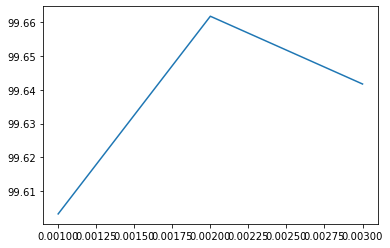

In [15]:
fig = plt.figure()
ax = plt.axes()

ax.plot(l_rate, obtained_accuracy);

In [ ]:
Task 2.2:

2.2) Answer this question: In task_2.py, what is the purpose of the decorator @tf.function?
Ans) - @tf.function could be used to create a graph for the corresponding code segment. 
     - It can be used to significantly reduce code runtime.
